# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_number_of_poi'
time_path = 'data/time/compare_number_of_poi_2020_12_13_23_38_54.npy'
cost_path = 'data/cost/compare_number_of_poi_2020_12_13_23_38_54.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(10, 101, step=10)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(30,) (30,)
Wall time: 5.98 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,0.00000,0.674476,0.164127,10
1,0.00000,0.565736,0.067346,20
2,0.00010,0.596385,0.047228,30
3,0.00000,0.567168,0.033729,40
4,0.00000,0.539597,0.031367,50
5,0.00000,0.532223,0.014971,60
6,0.00000,0.600393,0.019096,70
7,0.00008,0.528305,0.014018,80
8,0.00000,0.532323,0.012651,90
9,0.00000,0.612102,0.015191,100


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,14535.4,10613.6,10948.4,10
1,11073.0,8936.0,9052.7,20
2,9196.0,8032.0,8212.8,30
3,8457.5,7333.7,7680.0,40
4,7446.2,6472.5,6663.2,50
5,5978.9,5499.5,5703.9,60
6,5898.4,5487.3,5563.0,70
7,5039.5,4781.3,4865.7,80
8,5176.6,4879.3,4950.7,90
9,4966.9,4608.8,4705.0,100


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000018
approx         0.574871
approx_woc     0.041972
size          55.000000
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,14535.4,10613.6,10948.4,10,1.369507,1.327628
1,11073.0,8936.0,9052.7,20,1.239145,1.223171
2,9196.0,8032.0,8212.8,30,1.144920,1.119716
3,8457.5,7333.7,7680.0,40,1.153238,1.101237
4,7446.2,6472.5,6663.2,50,1.150436,1.117511
5,5978.9,5499.5,5703.9,60,1.087172,1.048213
6,5898.4,5487.3,5563.0,70,1.074918,1.060291
7,5039.5,4781.3,4865.7,80,1.054002,1.035719
8,5176.6,4879.3,4950.7,90,1.060931,1.045630
9,4966.9,4608.8,4705.0,100,1.077699,1.055664


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.141197
approx_woc_gain    1.113478
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        7776.84
approx        6664.40
approx_woc    6834.54
dtype: float64

# Plots

## Processing time

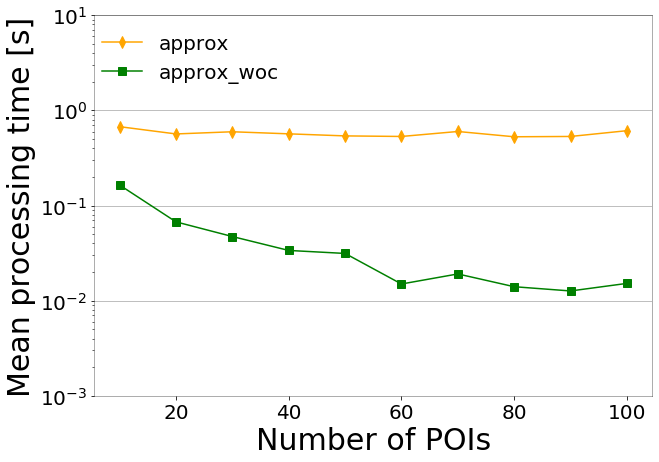

In [10]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-3, 10**1), 
    xlabel='Number of POIs',
    legend_loc=(0, 0.8)
)

## Travel cost

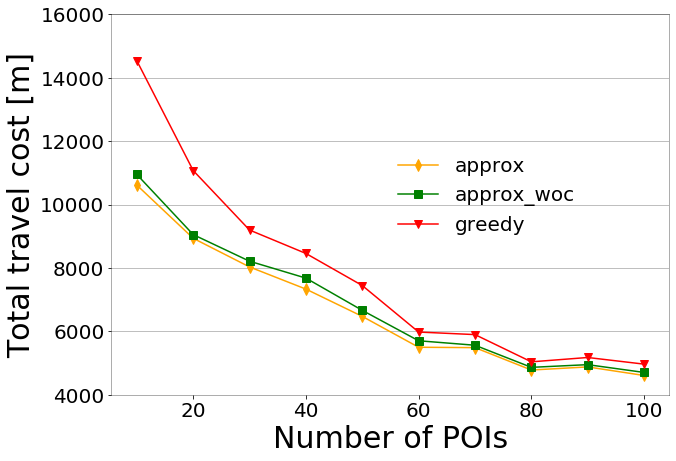

In [11]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(4000,16000), 
    xlabel='Number of POIs',
    legend_loc=(0.5, 0.4)
)

## Ride-sharing efficiency

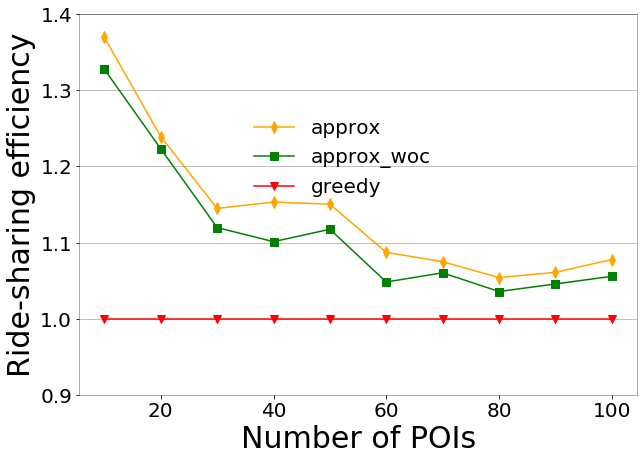

In [12]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(0.9,1.4), 
    xlabel='Number of POIs',
    legend_loc=(0.3, 0.5)
)